<a href="https://colab.research.google.com/github/saintyun/-DL_PaperReadingMeeting/blob/master/02_%EB%82%98%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%B6%94%EC%B2%9C_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_02_%EB%A6%AC%EB%B7%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%B6%94%EC%B2%9C%EC%84%B1%EB%8A%A5_%EB%81%8C%EC%96%B4%EC%98%AC%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Review Data 활용하기
1. 데이터셋 버전
  - 2013 버전([링크](http://snap.stanford.edu/data/web-Amazon-links.html))
  - 2014 버전([링크](https://jmcauley.ucsd.edu/data/amazon/))
  - 2018 버전([링크](https://nijianmo.github.io/amazon/index.html))
2. 2018버전 데이터셋 정보
  - reviews(ratings, text, helpfulness votes)
  - product metadata(descriptions, category information, price band and image features)
  - links(also viewed/also bought graphs)
  - 이외 추가 정보는 웹사이트 참고
  - 최근(2020-08-07)까지 업데이트된 내용이 있다
3. 데이터셋 크기가 매우 크기 때문에, `Complete review data`보다 `Small subsets 데이터`를 먼저 사용하는 것을 추천한다


## Download data

### 1. wget command를 활용한다

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz

--2021-01-21 04:56:47--  http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7010521 (6.7M) [application/octet-stream]
Saving to: ‘meta_Computers.json.gz’

meta_Computers.json 100%[===================>]   6.69M  18.6MB/s    in 0.4s    

2021-01-21 04:56:48 (18.6 MB/s) - ‘meta_Computers.json.gz’ saved [7010521/7010521]



In [ ]:
### load the meta data
data = []
with gzip.open('meta_Computers.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

18772
{'description': ['Brand new. Still in factory-sealed plastic.'], 'title': 'Kelby Training DVD: The Adobe Photoshop CS5 7-Point System for Camera Raw By Scott Kelby', 'image': ['https://images-na.ssl-images-amazon.com/images/I/31IlLImCVJL._SS40_.jpg'], 'brand': 'Kelby Training', 'rank': ['>#654,681 in Electronics (See Top 100 in Electronics)'], 'main_cat': 'Computers', 'date': 'December 2, 2011', 'asin': '0321732960'}


In [ ]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)
print(len(df))

18772


In [ ]:
df.head()

In [ ]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)
df3 = df.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

135
18637


In [ ]:
# how those unformatted rows look like
df4.iloc[0]

### 2. 직접 다운로드 한다

  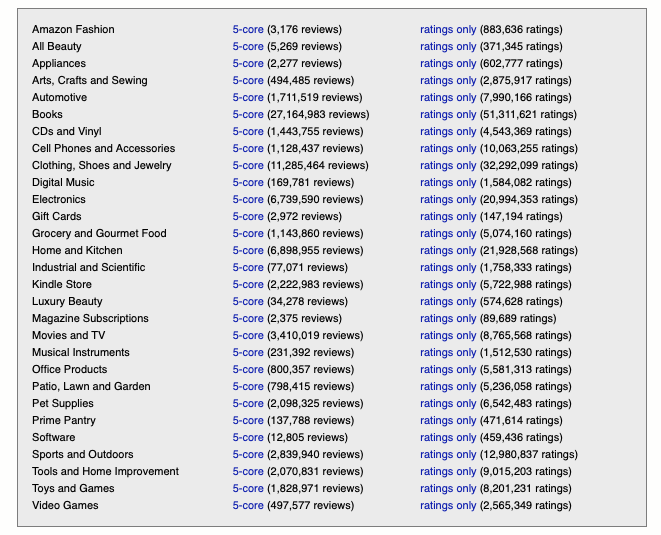

In [ ]:
import os, json
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data/amazon_reviews'

#### Read CSV file for ratings only
- (item, user, rating, timestamp)

In [ ]:
ratings_df = pd.read_csv(os.path.join(path, 'Software.csv'), header=None, names=['item','user','rating','timestamp'], encoding='utf-8')

In [ ]:
print(ratings_df.shape)
print(ratings_df.head())

(459436, 4)
         item            user  rating   timestamp
0  0077613252  A240ORQ2LF9LUI     4.0  1394496000
1  0077613252  A1YCCU0YRLS0FE     4.0  1393113600
2  0077613252  A1BJHRQDYVAY2J     1.0  1392595200
3  0077613252   APRDVZ6QBIQXT     3.0  1392595200
4  0077775473  A2JZTTBSLS1QXV     5.0  1381708800


#### Read JSON file
  - users and items with reviews each
  - 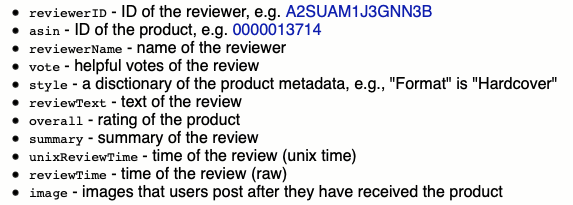

In [ ]:
data = []
with open(os.path.join(path, 'Software_5.json'), 'r', encoding='utf-8') as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [ ]:
all_df = pd.DataFrame.from_dict(data)
print(all_df.shape)
print(all_df.columns)

(12805, 12)
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


In [ ]:
all_df = all_df[['reviewerID', 'asin', 'vote', 'reviewText', 'overall']]
print(all_df.head())

       reviewerID  ... overall
0  A38NELQT98S4H8  ...     4.0
1  A3QJU4FEN8PQSZ  ...     4.0
2   ACJT8MUC0LRF0  ...     5.0
3   AYUF7YETYOLNX  ...     5.0
4  A31ICLWQ9CSHRS  ...     5.0

[5 rows x 5 columns]


In [ ]:
all_df.head()

reviewerID  ... overall
0  A38NELQT98S4H8  ...     4.0
1  A3QJU4FEN8PQSZ  ...     4.0
2   ACJT8MUC0LRF0  ...     5.0
3   AYUF7YETYOLNX  ...     5.0
4  A31ICLWQ9CSHRS  ...     5.0

[5 rows x 5 columns]

## Analyze data

1. `reviewer`와 `item` unique수
2. `reviewer`가 평균 review를 준 item 수

In [ ]:
# number of unique reviewers
print(len(all_df['reviewerID'].unique()))
# number of unique items
print(len(all_df['asin'].unique()))

1826
802


In [ ]:
reviewer_info_df = pd.concat([all_df.groupby(by='reviewerID')['asin'].count(),
                              all_df.groupby(by='reviewerID')['overall'].mean()], axis=1)
reviewer_info_df.columns = ['number_of_items','average_ratings']
print(reviewer_info_df.head())
print(reviewer_info_df.shape)

                number_of_items  average_ratings
reviewerID                                      
A100UD67AHFODS                5         4.800000
A105S56ODHGJEK               29         3.689655
A1075X1Q4M3S78                5         5.000000
A10C5CJK1YKGV0               10         4.100000
A10CRW7XRJBJ2G                5         3.200000
(1826, 2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2262561240>,
      dtype=object)

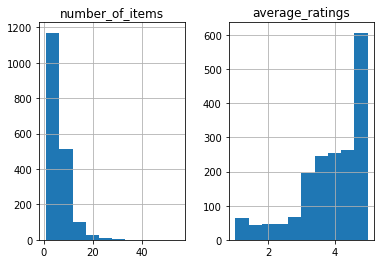

In [ ]:
# review를 쓴 평균 item 수, item의 평균 평점
reviewer_info_df.hist()

## Preprocess text data

In [ ]:
import re

In [ ]:
removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, .,?, !,【,】, …, ◆,%"

def preprocess_sent(sentence):
    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)

    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()

    return sentence

In [ ]:
all_df = all_df[['reviewText','overall']]
all_df.dropna(how='any', inplace=True)
all_df['reviewText'] = all_df['reviewText'].apply(lambda x: preprocess_sent(str(x).replace('\t',' ').replace('\n',' ')))
all_df['reviewText'] = all_df['reviewText'].apply(lambda x: ' '.join(x.split(' ')[:30]))

print(all_df.shape)

(12804, 2)


In [ ]:
all_df['num_lengths'] = all_df['reviewText'].apply(lambda x: len(x.split(' ')))
all_df = all_df[all_df.num_lengths > 10]

In [ ]:
all_df.drop('num_lengths', axis=1, inplace=True)
print(all_df.shape)
all_df.to_csv(os.path.join(path, 'Software_reviewText.csv'), sep='\t', encoding='utf-8')

(11273, 2)


In [ ]:
all_df['reviewText'].iloc[0]

'Ive been using Dreamweaver and its predecessor Macromedias UltraDev for many years For someone who is an experienced web designer this course is a high level review of the CS5'

In [ ]:
all_df['overall'].iloc[0]

4.0

## Load dataset

In [ ]:
import torch
from torchtext import data
from torchtext import datasets
import random

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField()

In [ ]:
fields = [(None, None), ('text', TEXT), ('label', LABEL)]

# Load Custom dataset
training_data = data.TabularDataset(path=os.path.join(path,'Software_reviewText.csv'),
                                  format ='tsv', fields = fields, skip_header = True)

# Print sample text
print(vars(training_data.examples[0]))

{'text': ['I', 've', 'been', 'using', 'Dreamweaver', 'and', 'its', 'predecessor', 'Macromedias', 'UltraDev', 'for', 'many', 'years', 'For', 'someone', 'who', 'is', 'an', 'experienced', 'web', 'designer', 'this', 'course', 'is', 'a', 'high', 'level', 'review', 'of', 'the', 'CS5'], 'label': '4.0'}


In [ ]:
MAX_VOCAB_SIZE = 25000

# Pre-trained embedding을 사용하고자 한다면 아래를 실행하자
# TEXT.build_vocab(train_data,
#                  max_size = MAX_VOCAB_SIZE,
#                  vectors = "glove.6B.100d",
#                  unk_init = torch.Tensor.normal_)

TEXT.build_vocab(training_data,
                 max_size = MAX_VOCAB_SIZE)

LABEL.build_vocab(training_data)

In [ ]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7f220fab8bf8>, {'5.0': 0, '4.0': 1, '3.0': 2, '1.0': 3, '2.0': 4})


In [ ]:
BATCH_SIZE = 64

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_data, valid_data = training_data.split(split_ratio=0.8, random_state = random.seed(1234))

train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data),
    sort_key = lambda x: len(x.text),
    sort_within_batch=False,
    batch_size = BATCH_SIZE
    )

## Model Architecture

- [PyTorch Text Classification](https://github.com/bentrevett/pytorch-sentiment-analysis)
- Yoon Kim, 2014, Convolutional Neural Networks for Sentence Classification([논문 링크](https://arxiv.org/pdf/1408.5882.pdf))
  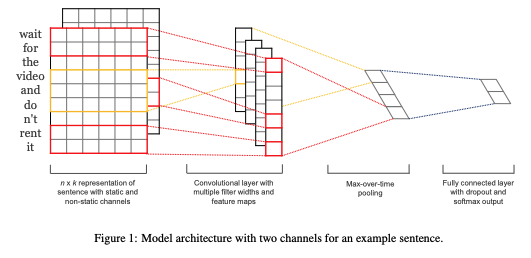

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim,
                 dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1,
                                              out_channels = n_filters,
                                              kernel_size = (fs, embedding_dim))
                                    for fs in filter_sizes
                                    ])

        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        #text = [sent len, batch size]
        text = text.permute(1, 0)

        #text = [batch size, sent len]

        embedded = self.embedding(text)

        #embedded = [batch size, sent len, emb dim]

        embedded = embedded.unsqueeze(1)

        #embedded = [batch size, 1, sent len, emb dim]

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]

        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]

        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        #pooled_n = [batch size, n_filters]

        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]

        return self.fc(cat)

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,389,505 trainable parameters


In [ ]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

## Train model

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# model = model.to(device)
# criterion = criterion.to(device)

In [ ]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [ ]:
def train(model, iterator, optimizer, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in iterator:

        optimizer.zero_grad()

        predictions = model(batch.text)

        loss = criterion(predictions, batch.label)

        acc = categorical_accuracy(predictions, batch.label)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for batch in iterator:

            predictions = model(batch.text)

            loss = criterion(predictions, batch.label)

            acc = categorical_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'cnn-model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 10s
	Train Loss: 1.502 | Train Acc: 38.91%
	 Val. Loss: 1.337 |  Val. Acc: 43.71%
Epoch: 02 | Epoch Time: 0m 10s
	Train Loss: 1.336 | Train Acc: 45.34%
	 Val. Loss: 1.304 |  Val. Acc: 43.49%
Epoch: 03 | Epoch Time: 0m 10s
	Train Loss: 1.269 | Train Acc: 47.89%
	 Val. Loss: 1.295 |  Val. Acc: 44.79%
Epoch: 04 | Epoch Time: 0m 10s
	Train Loss: 1.194 | Train Acc: 51.14%
	 Val. Loss: 1.237 |  Val. Acc: 47.02%
Epoch: 05 | Epoch Time: 0m 10s
	Train Loss: 1.135 | Train Acc: 54.15%
	 Val. Loss: 1.227 |  Val. Acc: 48.44%
Epoch: 06 | Epoch Time: 0m 9s
	Train Loss: 1.065 | Train Acc: 57.61%
	 Val. Loss: 1.206 |  Val. Acc: 50.55%
Epoch: 07 | Epoch Time: 0m 10s
	Train Loss: 1.002 | Train Acc: 59.90%
	 Val. Loss: 1.172 |  Val. Acc: 51.09%
Epoch: 08 | Epoch Time: 0m 10s
	Train Loss: 0.927 | Train Acc: 63.62%
	 Val. Loss: 1.170 |  Val. Acc: 51.30%
Epoch: 09 | Epoch Time: 0m 10s
	Train Loss: 0.831 | Train Acc: 67.84%
	 Val. Loss: 1.183 |  Val. Acc: 50.25%
Epoch: 10 | Epoch Ti

## Evaluate model

In [ ]:
model.load_state_dict(torch.load('cnn-model.pt'))

import spacy
nlp = spacy.load('en')

def predict_class(model, sentence, min_len = 4):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed)
    tensor = tensor.unsqueeze(1)
    preds = model(tensor)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [ ]:
pred_class = predict_class(model, "best item")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 0 = 5.0


In [ ]:
pred_class = predict_class(model, "worst item")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 3 = 1.0


In [ ]:
pred_class = predict_class(model, "it was best item, but requires to be fixed")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 0 = 5.0


## (참고) BERT Embedding 가져오기
1. word2vec
2. [fastText](https://fasttext.cc/)
3. [Glove](https://nlp.stanford.edu/projects/glove/)
4. Huggingface 참고([링크](https://huggingface.co/transformers/pretrained_models.html))


In [ ]:
# embedding + meta vector -> 512dim + 100dim -> 612 dim
# rating 1,2,3,4,5 -> prediction = 3 (40%)

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.8MB 7.6MB/s 
     |████████████████████████████████| 2.9MB 15.4MB/s 
     |████████████████████████████████| 890kB 63.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=7ec5c5d0f9c2ad76957646cf56c5fe036b367efbb67defeb67056fba0e966a64
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import warnings

import numpy as np
import torch
from nltk import tokenize
from transformers import BertModel, BertTokenizer

warnings.filterwarnings("ignore")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_embedding(sentence):
    sent_vectors = []
    for sent in tokenize.sent_tokenize(sentence):
        text = "[CLS] " + sent + " [SEP]"
        tokenized_text = tokenizer.tokenize(text)
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        segments_ids = [1] * len(tokenized_text)

        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensor = torch.tensor([segments_ids])

        with torch.no_grad():
            outputs = model(tokens_tensor, segments_tensor)
            encoded_layers = outputs[0] # last hidden state
            sentence_embedding = torch.mean(encoded_layers[0], dim=0)
            sent_vectors.append(sentence_embedding.detach().numpy())

    return np.array(sent_vectors).mean(axis=0)


In [ ]:
bert_embedding = get_embedding('hello, today is thursday')

In [ ]:
len(bert_embedding)

768